# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Individual Coding Challenge
Week 5 | Day 2

This is your first individual coding challenge. There are a series of exercises in this notebook that you will need to perform. This challenge to be done individually - **without help from either fellow students or the instructors**. You are free to use the documention or any online resources you choose. You will have one hour to complete this workbook. If you get stuck on one question keep moving.<br><br> **It must be submitted before 5pm via Slack**. <br><br>**- _NO LATE ENTRIES WILL BE ACCEPTED_ - <br><br>The Slack timestamp of submission will be definitive.**

### 1. Read in the csv at this link using pandas and save it as a DataFrame:
https://www.dropbox.com/s/1k9cgsd7bzce0yk/housing-data.csv?dl=1

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn import preprocessing


In [2]:
drop = pd.read_csv('https://www.dropbox.com/s/1k9cgsd7bzce0yk/housing-data.csv?dl=1')

In [3]:
drop.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


### 2. Get the datatypes of your DataFrame and find the 75th percentile of 'age' and 'price'

In [4]:
drop.dtypes

sqft     int64
bdrms    int64
age      int64
price    int64
dtype: object

In [5]:
drop.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


### 3. Get the correlations for each column vs. the others. Which feature has the highest correlation with price?

In [13]:
cor_drop = drop.corr
print cor_drop()

# Square Feet has the highest correlation with price

           sqft     bdrms       age     price
sqft   1.000000  0.559967  0.079853  0.854988
bdrms  0.559967  1.000000  0.077486  0.442261
age    0.079853  0.077486  1.000000  0.051791
price  0.854988  0.442261  0.051791  1.000000


### 4. Plot the correlations and histograms using seaborn

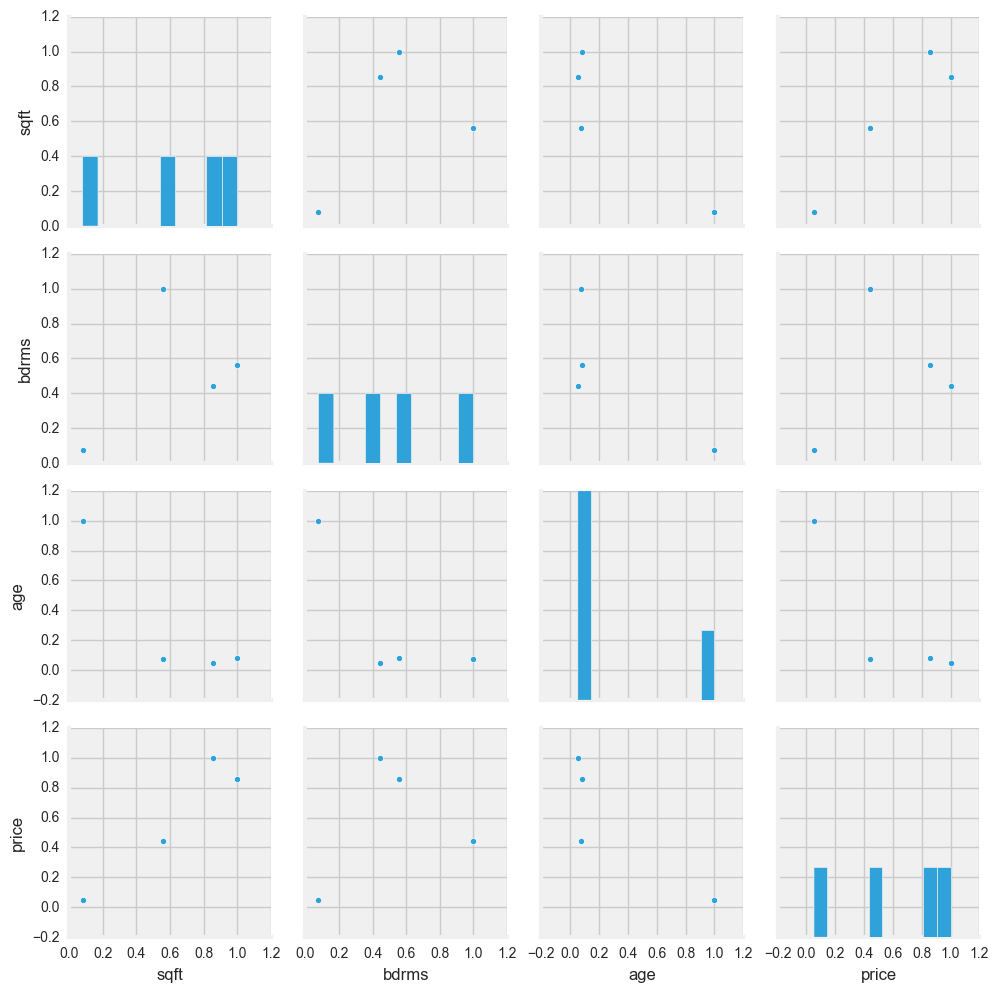

In [7]:
sns.pairplot(cor_drop)

### 5. Change the column names to uppercase using a list comprehension

In [14]:
drop.columns = [x.upper() for x in drop.columns]



In [15]:
drop.head()

,SQFT,BDRMS,AGE,PRICE
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


### 6. Standardize each column - except price - using a list comprehension. Save the newly scaled columns to the DataFrame with the prepend 'SC_'. For example, 'SC_BDRMS'. You may use numpy for this. 

Refer to this if you are confused as to the formula: [Standardization](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#z-score-standardization-or-min-max-scaling)

In [17]:
drop.ix[:, 0] = (drop.ix[:, 0]  - drop.ix[:, 0].mean())/ drop.ix[:, 0].std()

In [19]:
drop

,SQFT,BDRMS,AGE,PRICE
0,0.130010,3,70,399900
1,-0.504190,3,28,329900
2,0.502476,3,44,369000
3,-0.735723,2,49,232000
4,1.257476,4,75,539900
5,-0.019732,4,61,299900
6,-0.587240,3,12,314900
7,-0.721881,3,57,198999
8,-0.781023,3,14,212000
9,-0.637573,3,15,242500


## 7. Use sk-learn's StandardScaler to confirm that your results are correct. You will need to read the documentation on how to use this.

[StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [24]:
std_scale = preprocessing.StandardScaler().fit(drop[['SQFT', 'BDRMS', 'AGE']])
df_std = std_scale.transform(drop[['SQFT', 'BDRMS', 'AGE']])

In [26]:
# Yes! I believe I am :-)
df_std

array([[  1.31415422e-01,  -2.26093368e-01,   1.20445283e+00],
       [ -5.09640698e-01,  -2.26093368e-01,  -6.51589238e-01],
       [  5.07908699e-01,  -2.26093368e-01,   5.54744084e-02],
       [ -7.43677059e-01,  -1.55439190e+00,   2.76431798e-01],
       [  1.27107075e+00,   1.10220517e+00,   1.42541022e+00],
       [ -1.99450507e-02,   1.10220517e+00,   8.06729533e-01],
       [ -5.93588523e-01,  -2.26093368e-01,  -1.35865288e+00],
       [ -7.29685755e-01,  -2.26093368e-01,   6.29963621e-01],
       [ -7.89466782e-01,  -2.26093368e-01,  -1.27026993e+00],
       [ -6.44465993e-01,  -2.26093368e-01,  -1.22607845e+00],
       [ -7.71822042e-02,   1.10220517e+00,  -1.57961027e+00],
       [ -8.65999486e-04,  -2.26093368e-01,  -6.95780716e-01],
       [ -1.40779041e-01,  -2.26093368e-01,   9.96658863e-02],
       [  3.15099326e+00,   2.43050370e+00,   2.76431798e-01],
       [ -9.31923697e-01,  -2.26093368e-01,   6.74155099e-01],
       [  3.80715024e-01,   1.10220517e+00,   1.5137931

### 8. Using .apply() on your _DataFrame_, create a function that returns a count of the number of scaled columns that are positive. For example, if one scaled column is positive and two are negative, return 1. If all are negative return 0. Hint: It may be helpful to use .apply() on just a portion of your DataFrame. Save this new column as 'POS'.

In [ ]:
drop['POS'] = drop[drop['SQFT', 'BDRMS', 'AGE'].apply(count)]

### 9. Using a lambda function with .apply() return a 1 if the price is above the mean price and a 0 if not. Save this new column as 'HIGH_PRICE'.

### 9. Using a minimum of 3 feature columns (not 'PRICE'), set a design matrix (X).  Next set a target vector (y). The target vector should be the 'HIGH_PRICE' column you just created.

### 10. Using sk-learn's GridSearchCV and k-nn, find the optimal hyper-parmaters. Set the number of folds to 3 and the k to the range from 1 to 5. What is the best k? What is the best score? What does this score represent?

### Bonus: If you have time, re-run the model using the scaled feature columns using a logistic regression. Test which features are most important using a penalized regression. Which is better L1 or L2? What penalty (C) is optimal?